In [25]:
%matplotlib inline
import pandas as pd
import networkx as nx
import ujson as json
import metis
import random
from matplotlib import pyplot as plt
from pprint import pprint

In [26]:
dataset="baltimore"

In [27]:
def build_retweet_graph(raw_file_path):
    g = nx.Graph()
    with open(raw_file_path, 'r') as f:
        for l in f:            
            t = json.loads(l)    
            if t['rtds_tweet']['retweet_type'] == 1:
                g.add_edge(t['rtds_tweet']['user_id'],
                           t['rtds_tweet']['retweeted_status_user_id'],
                           created_at=t['rtds_tweet']['created_at_timestamp'])
    return g

In [28]:
def get_largest_connected_subgraph(g):
    ccs = nx.connected_components(g)
    nodes = max(ccs, key=len)
    return g.subgraph(nodes)


In [29]:
g = build_retweet_graph('data/tweets_{}.txt'.format(dataset))


In [30]:
if True:
    nx.write_gpickle(g, 'data/{}.pkl'.format(dataset))
    nx.write_graphml(g, 'output/{}.graphml'.format(dataset))

In [31]:
cc_g = get_largest_connected_subgraph(g)
print(g.number_of_nodes(), g.number_of_edges())
print(cc_g.number_of_nodes(), cc_g.number_of_edges())
g = cc_g

93980 145300
90166 142994


In [32]:
# take the core sub graph
nodes = [n for n in g.nodes() if g.degree(n) > 1]
print(len(nodes))
nodes = random.sample(nodes, 5000)
g = nx.subgraph(g, nodes)
g = get_largest_connected_subgraph(g)

26136


In [33]:
print(g.number_of_nodes())
print(g.number_of_edges())

2021
2620


In [34]:
cuts, parts = metis.part_graph(g)
print(cuts)

139


In [35]:
from forceatlas import forceatlas2_layout

In [36]:
pos = forceatlas2_layout(g, iterations=100)

100%|██████████| 100/100 [00:58<00:00,  1.64it/s]


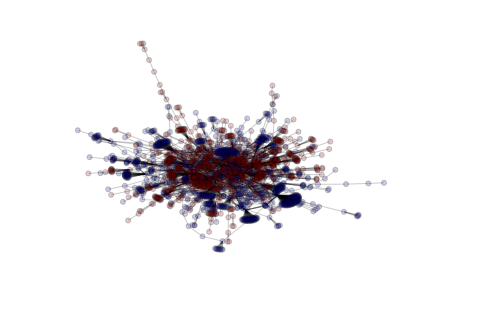

In [37]:
nx.draw(g, pos=pos, with_label=False, node_color=parts, node_size=25, alpha=0.2)

In [38]:
plt.savefig('figs/{}.pdf'.format(dataset))

In [49]:
g = nx.barabasi_albert_graph(50000, 3)
nx.write_gpickle(g, 'data/barabasi.pkl')